# 피마 인디언 당뇨병 예측 베스트 모델 찾은 후 자동중단

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [5]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 데이터 전처리와 훈련/테스트 셑 나누기

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-1].values)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df[8].values, stratify=df[8].values, random_state=2021
)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### 모델 정의/설정

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')               
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 콜백 함수 정의

In [19]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [20]:
# 모델 파일 이름
modelpath = MODEL_DIR + 'pima-best.hdf5'

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
                    filepath=modelpath,     # 모델을 저장할 파일
                    monitor='val_loss',     # validation loss를 체크
                    verbose=1,
                    save_best_only=True     # 베스트 모델만 저장
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

### 모델 학습

In [23]:
history = model.fit(
    X_train, y_train, validation_split=0.2, 
    epochs=100, batch_size=30, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.69795, saving model to ./model/pima-best.hdf5

Epoch 00002: val_loss improved from 0.69795 to 0.68627, saving model to ./model/pima-best.hdf5

Epoch 00003: val_loss improved from 0.68627 to 0.67666, saving model to ./model/pima-best.hdf5

Epoch 00004: val_loss improved from 0.67666 to 0.66738, saving model to ./model/pima-best.hdf5

Epoch 00005: val_loss improved from 0.66738 to 0.65957, saving model to ./model/pima-best.hdf5

Epoch 00006: val_loss improved from 0.65957 to 0.65169, saving model to ./model/pima-best.hdf5

Epoch 00007: val_loss improved from 0.65169 to 0.64333, saving model to ./model/pima-best.hdf5

Epoch 00008: val_loss improved from 0.64333 to 0.63433, saving model to ./model/pima-best.hdf5

Epoch 00009: val_loss improved from 0.63433 to 0.62491, saving model to ./model/pima-best.hdf5

Epoch 00010: val_loss improved from 0.62491 to 0.61463, saving model to ./model/pima-best.hdf5

Epoch 00011: val_loss improved from 0.61463

In [24]:
del model

In [25]:
from tensorflow.keras.models import load_model

best_model = load_model(modelpath)
acc = best_model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7812
정확도: 0.7812


### 학습과정 시각화

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 검증셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 정확도
y_acc = history.history['accuracy']

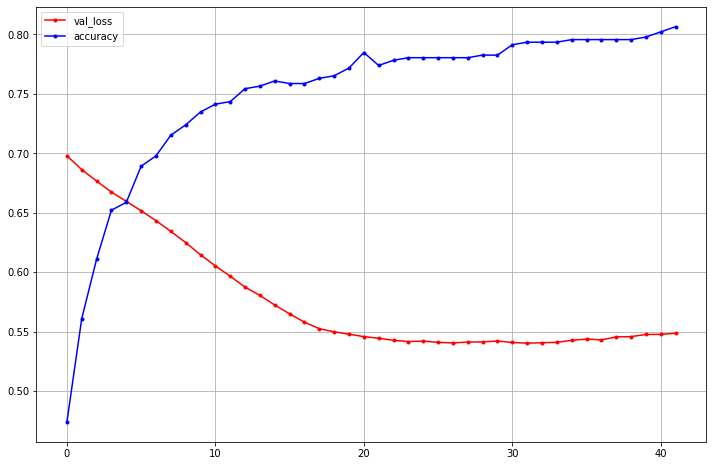

In [28]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, 'ro-', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=3, label='accuracy')
plt.legend()
plt.grid()
plt.show()